# **18차시: 다양한 성능 지표**
## 🔍 **학습목표**
- 다양한 분류 모델의 예측 결과를 보고 성능 지표를 해석할 수 있다.
- 시험에 자주 출제되는 "가장 좋은 모델은?" 유형에 대응할 수 있다.

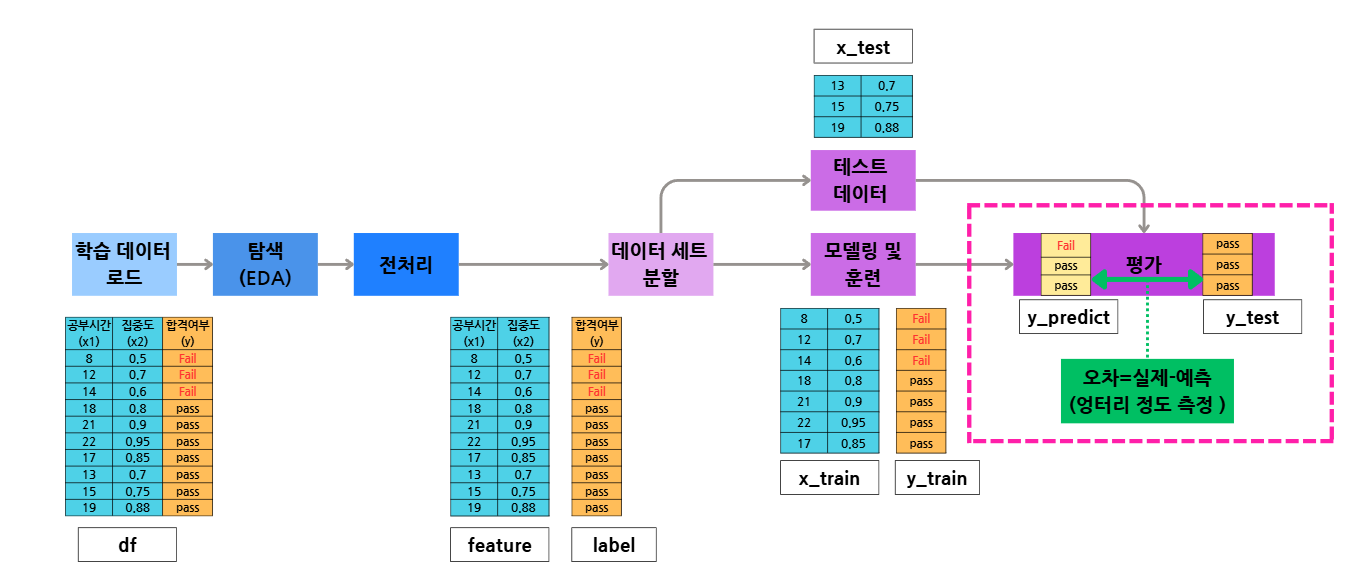


## **📌 다양한 지표가 필요한 이유**



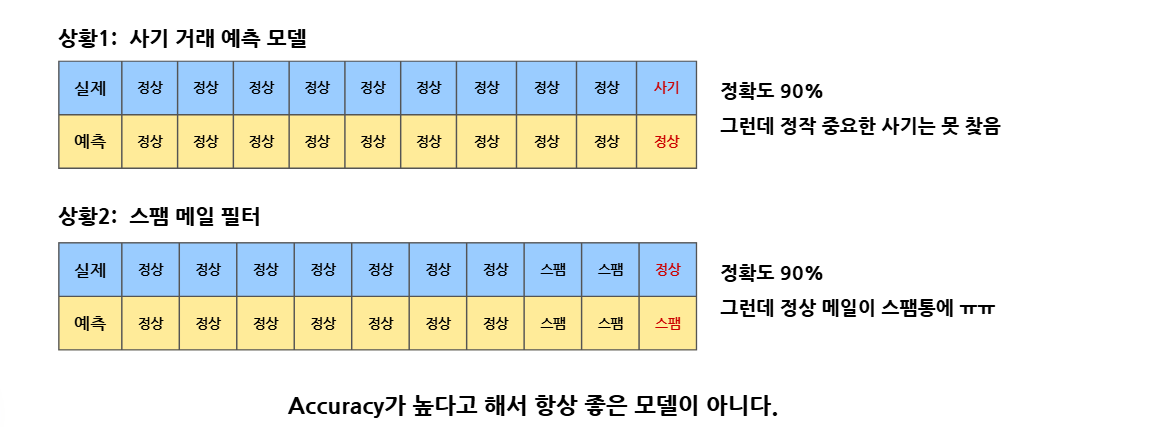

## **📌 혼돈 행렬: Confusion Matrix**

- 분류 모델이 예측한 결과와 실제 정답을 비교해 정리한 표입니다.

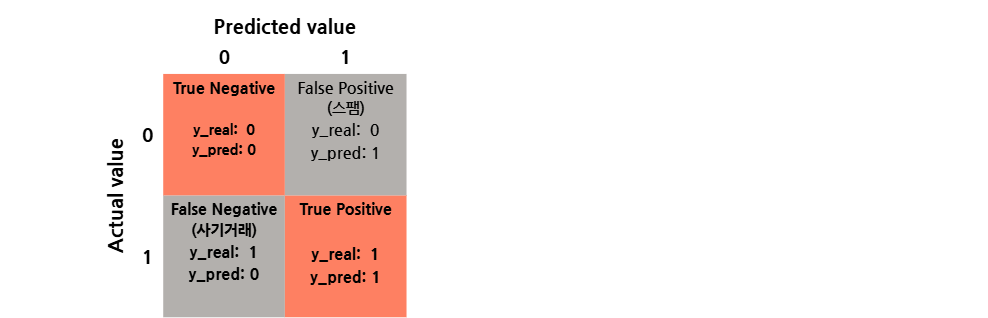

## 📏 **분류 모델의 평가 지표**

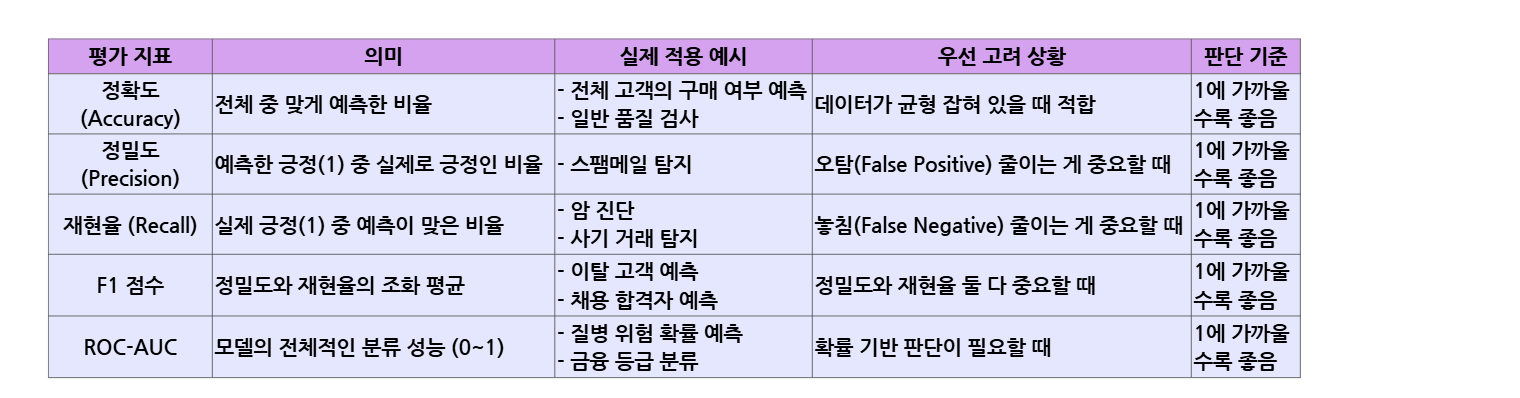

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, recall_score,precision_score,f1_score

# 사기 거래 예측 모델
y_real = [0,0,0,0,0,0,0,0,0,1] #사기 거래
y_pred = [0,0,0,0,0,0,0,0,0,0] #정상 거래

print("Accuracy:", accuracy_score(y_real, y_pred))
print("Recall:", recall_score(y_real, y_pred))
print("Precision:", precision_score(y_real, y_pred))
print("f1_score:", f1_score(y_real, y_pred))


Accuracy: 0.9
Recall: 0.0
Precision: 0.0
f1_score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


> **정확도는 높지만 중요한 상황에서 모델이 완전히 실패**
> - Accuracy만으로 모델의 성능을 판단할 수 없음.

### **1. 정밀도:Precision**
> **오탐이 문제되는 경우 → False Positive (FP)**
> - 예: 정상 이메일을 스팸으로 분류, 경찰 출동 시스템
> - 이런 경우 **Precision(정밀도)**이 중요한 지표입니다.

In [ ]:
# 스팸 메일 필터
y_real = [0,0,0,0,0,0,0,1,1,0] #정상메일
y_pred = [0,0,0,0,0,0,0,1,1,1] #사기메일

print("Accuracy:", accuracy_score(y_real, y_pred))
print("Recall:", recall_score(y_real, y_pred))
print("Precision:", precision_score(y_real, y_pred))
print("f1_score:", f1_score(y_real, y_pred))

Accuracy: 0.9
Recall: 1.0
Precision: 0.6666666666666666
f1_score: 0.8
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.67      1.00      0.80         2

    accuracy                           0.90        10
   macro avg       0.83      0.94      0.87        10
weighted avg       0.93      0.90      0.91        10



### **2. 재현율:Recall**
> **놓치면 안 되는 경우 → False Negative (FN)**
> - 예: 암 환자, 사기 거래처럼 실제 양성인데 놓치면 치명적인 상황
> - 이럴 땐 **Recall(재현율)**이 중요한 지표입니다.

In [ ]:
# 사기 거래 예측 모델
y_real = [0,0,0,0,0,0,1,1,1,1] #사기거래
y_pred = [0,0,0,0,0,0,1,1,1,0] #정상거래

print("Accuracy:", accuracy_score(y_real, y_pred))
print("Recall:", recall_score(y_real, y_pred))
print("Precision:", precision_score(y_real, y_pred))
print("f1_score:", f1_score(y_real, y_pred))

Accuracy: 0.9
Recall: 0.75
Precision: 1.0
f1_score: 0.8571428571428571


### **3. F1-score**
> **Recall과 Precision의 균형이 중요한 경우**
> - 정확도도 괜찮고 정밀도도 좋지만, 놓친 스팸이 많아서 문제가 됩니다.
> - 이럴 땐 precision과 recall을 함께 고려한 **F1-score**로 평가해야 합니다.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# 실제값: 정상 0 / 스팸 1
y_real = [0,0,0,0,0,1,1,1,1,1]  # 총 5개 스팸

# 예측값: 대부분 맞지만, 스팸을 2개만 잡음 (recall 낮음)
y_pred = [0,0,0,0,0,0,0,1,1,0]  # TP=2, FN=3, FP=0

print("Accuracy:", accuracy_score(y_real, y_pred))     # 높게 나올 수 있음
print("Precision:", precision_score(y_real, y_pred))   # 1.0 (오탐 없음)
print("Recall:", recall_score(y_real, y_pred))         # 0.4 (3건 놓침)
print("F1-score:", f1_score(y_real, y_pred))           # 0.57 (균형 낮음)

Accuracy: 0.7
Precision: 1.0
Recall: 0.4
F1-score: 0.5714285714285714


## **4.classification_report 해석 실습**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_real, y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.40      0.57         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10



---

## **연습 문제**

### **온라인 교육 플랫폼 회원 이탈 예측 모델**

**[데이터 설명: online_edu_churn.csv]**
- age: 사용자 나이 (일부 결측값 있음)
- salary: 사용자의 연간 추정 소득 (단위: 원)
- experience_years: 해당 분야 또는 업무 경력 (년 단위)
- weekly_study_hours: 주당 평균 학습 시간 (시간)
- courses_completed: 수강 완료한 강의 수
- login_days_past30: 최근 30일 간 로그인한 총 일수
- membership: 회원 등급 (예: basic, premium 등)
- device: 주 사용 기기 (예: desktop, mobile, tablet)
- region: 거주 지역 (예: 서울특별시, 경기도 등)
- promo_opt_in: 마케팅 수신 동의 여부 (1: 동의, 0: 비동의)
- num_promo_emails_last3m: 최근 3개월간 받은 프로모션 이메일 수
- **churn: 이탈 여부 (1: 이탈, 0: 유지) → Target**

### **문제 1. 데이터를 로드하고 전처리 코드를 실행하시오.**




In [ ]:
import pandas as pd

# 데이터 로드
df = pd.read_csv("online_edu_churn.csv")

# 데이터 전처리
df = df.dropna()

# 데이터 전처리
obj_cols = ['membership', 'device', 'region']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in obj_cols:
    df[col] = le.fit_transform(df[col])

### **문제 2. X, y 데이터를 분리하고 훈련/검증 데이터로 나누시오.**
- 사용 데이터 프레임: df
- 설명 변수 X, 타겟 변수 y로 분할
- 훈련:검증 = 8:2
- random_state = 42
- 클래스가 균형있게 분할될 것:stratify
- train_test_split 사용
- 결과는 다음 변수에 저장할 것:X_train, X_valid, y_train, y_valid

In [ ]:
# 여기에 코드를 작성하세요.
from sklearn.model_selection import train_test_split

X = df.drop('', axis=1)
y = df['']

train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


### **문제 3.아래의 조건으로 두 개의 모델을 학습하시오..**
- Logistic Regression
  - 기본 설정 사용

- GradientBoosting
    - n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42

- 각 모델을 학술하고 다음 변수에 저장하시오:
  - `logi`: LogisticRegression 모델
  - `gb` : 그레이디언트 부스팅 모델

In [ ]:
# 여기에 코드를 작성하세요.

# logi = LogisticRegression()
# logi.fit(X_train, y_train)


# gb = GradientBoostingClassifier()
# gb.fit(X_train, y_train)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

logi = LogisticRegression()
logi.fit(X_train, y_train)


gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

### **문제 4. classification_report()를 출력하고, 각 모델의 F1-score를 확인하시오.**

- 출력 결과를 확인하여 각 모델의 F1-score(이탈 클래스: 1) 을 기준으로 베스트 모델이름을 `답안04`에 저장하시오.
(예: 답안04='logi', 답안04='gradient')

In [ ]:
# 여기에 코드를 작성하세요.
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import classification_report

y_pred_logi = logi.predict(X_valid)
y_pred_gb = gb.predict(X_valid)

print("### Logistic Regression:")
print(classification_report(y_valid,y_pred_logi))

print("### Gradient:")
print(classification_report(y_valid,y_pred_gb))

답안04='gradient'

### Logistic Regression:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       418
           1       0.69      0.58      0.63       363

    accuracy                           0.68       781
   macro avg       0.68      0.67      0.67       781
weighted avg       0.68      0.68      0.68       781

### Gradient:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       418
           1       0.99      0.99      0.99       363

    accuracy                           0.99       781
   macro avg       0.99      0.99      0.99       781
weighted avg       0.99      0.99      0.99       781



### **문제 5. 문제 4에서 선정한 모델에 대해 confusion matrix를 시각화하고, FN(실제 이탈을 놓친 경우)의 개수를 계산하시오.**

- ConfusionMatrixDisplay를 사용하여 confusion matrix를 출력하시오.

- confusion matrix에서 FN의 값(왼쪽 아래)을 추출하여 `답안05`에 저장하시오.

In [ ]:
# 여기에 코드를 작성하세요.
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_valid, y_pred_gb)

ConfusionMatrixDisplay(cm).plot()


np.int64(5)

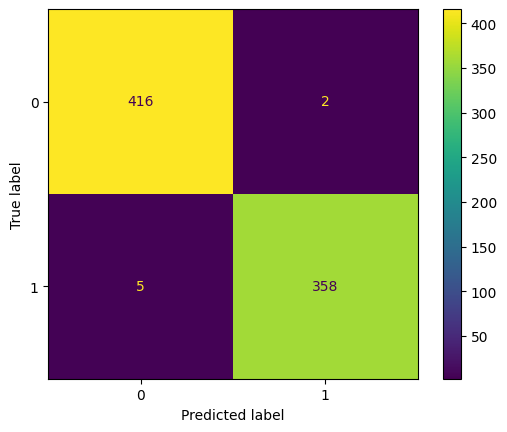

In [ ]:
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_valid, y_pred_gb)

ConfusionMatrixDisplay(cm).plot()


답안05=cm[1,0]
답안05


> **참고**
> - FN = 5는, **실제 이탈한 고객 5명을 모델이 ‘유지할 고객’이라고 잘못 예측한 경우**를 의미합니다.
> - 이는 **이탈 고객을 놓친 것** 으로, **기회를 잃은 손실**로 해석할 수 있습니다.
> -이런 결과는 향후 **모델 튜닝 방향 설정에 중요한 단서**가 됩니다.